# Downloading the data

Before we can use OpenStreetMap (OSM) data, we have to downmload it. We will do that using [Pyrosm](https://pyrosm.readthedocs.io/en/latest/), a Python library for reading OpenStreetMap from Protocolbuffer Binary Format -files (*.osm.pbf) into Geopandas GeoDataFrames.

Pyrosm provides a function [`get_data()`](https://pyrosm.readthedocs.io/en/latest/basics.html#protobuf-file-what-is-it-and-how-to-get-one) that can be used to download any PBF dataset available at Geofabrik or BBBike to your local machine without the need to go to the website and do this manually.

In [1]:
from pathlib import Path
from pyrosm import get_data

Path("data").mkdir(parents=True, exist_ok=True)
fp = get_data("italy", directory="data")
print("Data was downloaded to:", fp)


Data was downloaded to: C:\Users\ASUS\PycharmProjects\boring-wozniak\data\italy-latest.osm.pbf


In [28]:
from pyrosm import OSM

fp = 'C:\\Users\\ASUS\\PycharmProjects\\boring-wozniak\\data\\veneto_mini.pbf'
osm = OSM(fp)

In [29]:
# drive_net = osm.get_network(network_type="driving")
# drive_net.plot()

In [30]:
# drive_net.head(100)

<AxesSubplot: >

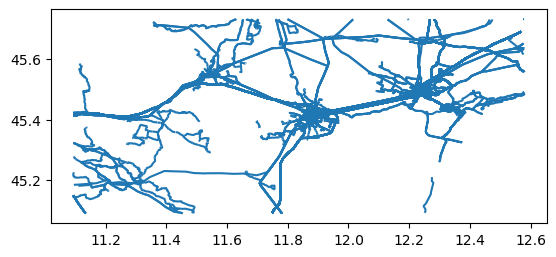

In [31]:
# Test reading all transit related data (bus, trains, trams, metro etc.)
# Exclude nodes (not keeping stops, etc.)
routes = ["bus", "ferry", "railway", "subway", "train", "tram", "trolleybus"]
rails = ["tramway", "light_rail", "rail", "subway", "tram"]
bus = ['yes']
transit = osm.get_data_by_custom_criteria(custom_filter={
                                        'route': routes,
                                        'railway': rails,
                                        'bus': bus,
                                        'public_transport': True},
                                        # Keep data matching the criteria above
                                        filter_type="keep",
                                        # Do not keep nodes (point data)
                                        keep_nodes=False,
                                        keep_ways=False,
                                        keep_relations=True)
transit.plot()

In [32]:
transit.head(1000)

,bicycle,duration,foot,from,network,railway,route,to,type,name,...,url,website,public_transport,id,timestamp,version,changeset,geometry,tags,osm_type
0,None,None,None,None,AIM,None,bus,None,route,None,...,None,None,bus,17316111,0,-1,0,"MULTILINESTRING ((11.50862 45.62117, 11.50848 ...","{""colour"":""yellow""}",relation
1,None,None,None,Capolinea Sud,APS Mobilità,None,tram,Pontevigodarzere,route,Tram SIR1: Capolinea Sud => Pontevigodarzere,...,None,None,None,24301203,0,-1,0,"LINESTRING (11.87417 45.36795, 11.87415 45.367...","{""colour"":""blue"",""public_transport:version"":""2...",relation
2,None,None,None,Piazza Toselli,Busitalia Veneto S.p.A.,None,bus,Via Ippodromo,route,U9/Piazza Toselli-Via Ippodromo,...,None,None,None,25052412,0,-1,0,"MULTILINESTRING ((11.85708 45.40799, 11.85706 ...","{""colour"":""#f4911c"",""day_on"":""Mo-Sa 06:35-20:5...",relation
3,None,None,None,Ponte di Brenta,Busitalia Veneto S.p.A.,None,bus,Sarmeola,route,U10/Ponte di Brenta-Sarmeola,...,None,None,None,25429616,0,-1,0,"LINESTRING (11.94933 45.42597, 11.94933 45.426...","{""colour"":""#cf1f5d"",""network:wikidata"":""Q48808...",relation
4,None,None,None,Park Colli,APS Mobilità,None,bus,Park Colli,route,Bus 2: Anello Bus dell'Arte,...,None,None,None,25807264,0,-1,0,"MULTILINESTRING ((11.84641 45.39933, 11.84595 ...","{""colour"":""#6ad2f7"",""network:wikidata"":""Q36011...",relation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,None,None,None,Mestre Centro B3,Extraurbano Nord,None,bus,Scorze',route,Linea Actv 6E: Mestre Centro B3 => Scorze',...,None,None,None,66222341594,0,-1,0,"LINESTRING (12.24601 45.49351, 12.24608 45.493...","{""colour"":""#393185"",""public_transport:version""...",relation
455,None,None,None,Noale,Extraurbano Nord,None,bus,Martellago,route,Linea Actv HE: Noale => Martellago,...,None,None,None,66235733383,0,-1,0,"MULTILINESTRING ((12.06798 45.55295, 12.06832 ...","{""colour"":""#393185"",""public_transport:version""...",relation
456,None,None,None,Martellago,Extraurbano Nord,None,bus,Noale,route,Linea Actv HE: Martellago => Noale,...,None,None,None,66249125173,0,-1,0,"MULTILINESTRING ((12.06798 45.55295, 12.06766 ...","{""colour"":""#393185"",""public_transport:version""...",relation
457,None,None,None,None,None,None,None,None,public_transport,Cavanella d'Adige,...,None,None,stop_area,67208989783,0,-1,0,"POLYGON ((12.24944 45.11111, 12.24946 45.11112...",None,relation


In [33]:
transit[["from", "to", "route"]]

,from,to,route
0,None,None,bus
1,Capolinea Sud,Pontevigodarzere,tram
2,Piazza Toselli,Via Ippodromo,bus
3,Ponte di Brenta,Sarmeola,bus
4,Park Colli,Park Colli,bus
...,...,...,...
454,Mestre Centro B3,Scorze',bus
455,Noale,Martellago,bus
456,Martellago,Noale,bus
457,None,None,None
